**Rubanenko Evgeny  
DIHT 595**

Second task - *Document Analysis*

In [1]:
import numpy as np

from os import listdir
from os.path import isfile, join

from catboost import CatBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import normalize

import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

After some looking into given `.xml` files we can easily find out what we need to extract from this files.

First we need to extract features (actually there are items in `.xml` file, but still), named:
- ВlackCount
- WhiteHolesCount
- HorzStrokesCount
- VertStrokesCount
- MaxHorzStrokeLength

We don't care about other items cause it was prohibited to use them.

Let's wrap everything up in a nice set of functions.

In [2]:
def process_xml(file):
    # Parse xml
    tree = ET.parse(file)
    root = tree.getroot()
    
    # Extract features and collect them
    data = []
    for wf in root[1]:
        tmp = []
        for i in range(4, 9):
            tmp.append(wf.items()[i][1])
        data.append(tmp)
    
    # Cast to fancy numpy
    return np.array(data, dtype=np.float32)

In [3]:
def process_folder(folder):
    # Get every .xml file in folder
    files = [file for file in listdir(folder) if isfile(join(folder, file))]
    xmls = [file for file in files if '.xml' in file]
    
    # Collect data
    data = np.array([], dtype=np.float32)
    for xml in xmls:
        data = np.append(data, process_xml(folder + '/' + xml))
    
    # Don't forget to reshape to 2d array
    return data.reshape(-1, 5)

In [4]:
def create_dataset():
    # Parse two folder (i.e. classes) and put labels
    nontext = process_folder('Nontext')
    nontext = np.hstack((nontext, np.zeros((nontext.shape[0], 1), dtype=np.int32)))
    text = process_folder('Text')
    text = np.hstack((text, np.ones((text.shape[0], 1), dtype=np.int32)))
    return np.array(np.vstack((text, nontext)))

In [5]:
data = create_dataset()

Let's try **RF.**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1],
                                                    data[:, -1],
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print('ACCURACY:\n        {:4f}'.format(accuracy_score(y_pred, y_test)))

ACCURACY:
        0.820429


Ok, 0.82 isn't bad. But maybe it's possible to make it better?

What about feature importance?

In [10]:
print('FEATURE IMPORTANCE:\n        {}'.format(clf.feature_importances_))

FEATURE IMPORTANCE:
        [0.62098538 0.         0.25074878 0.07358645 0.05467938]


Let's check 1st and 3rd feature.

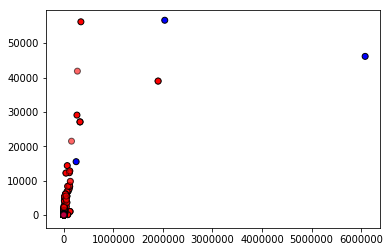

In [11]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

Need to rescale.

In [12]:
X = data[:, :-1]
y = data[:, -1]

In [13]:
X = normalize(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

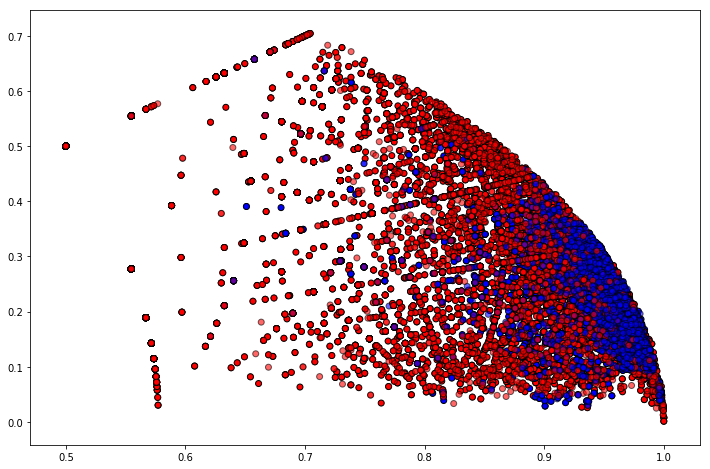

In [15]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

Seems pretty bad.  
So RF did a good job.

Let's check everything pairwise. Maybe there is some hope.

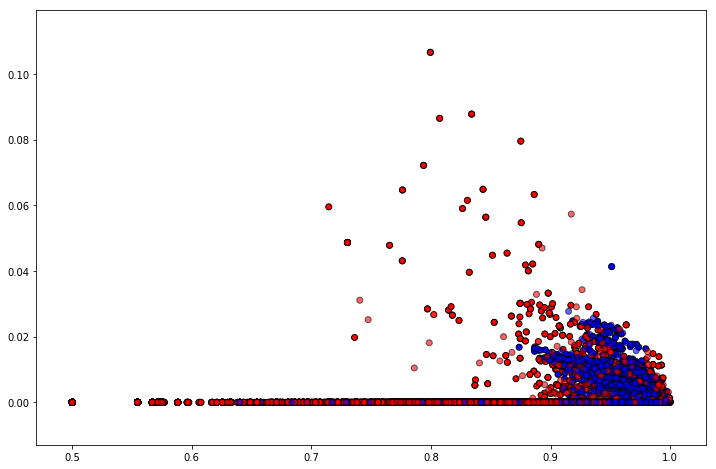

In [16]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

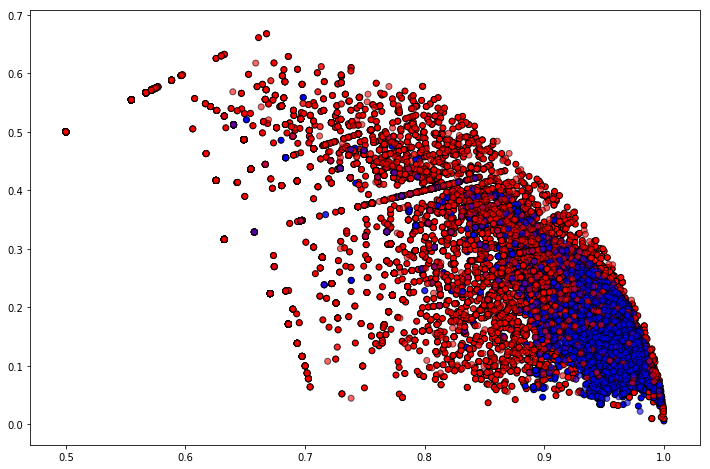

In [17]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 3], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

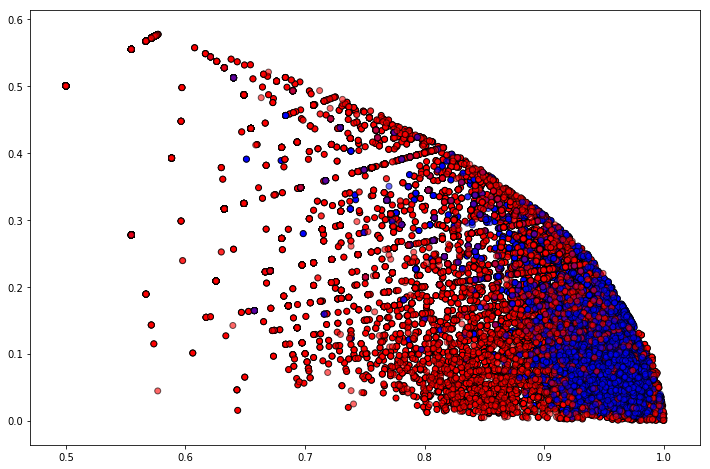

In [18]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 4], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 4], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

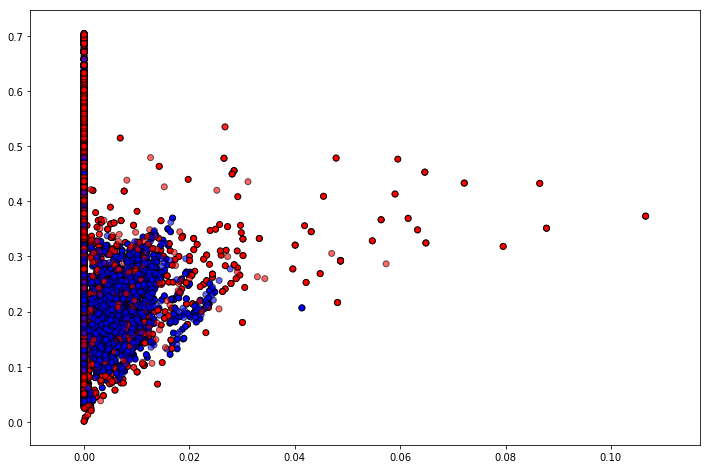

In [19]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

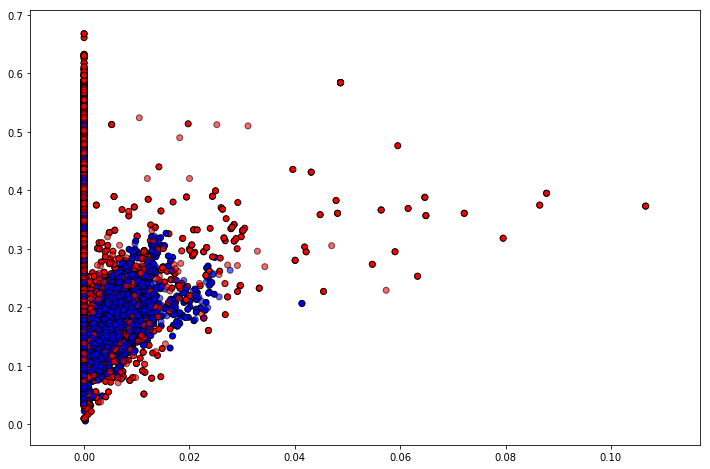

In [20]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 1], X_train[:, 3], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 1], X_test[:, 3], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

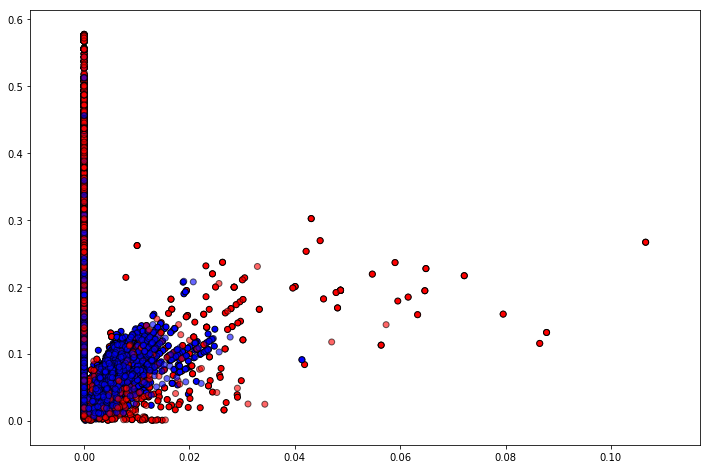

In [21]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 1], X_train[:, 4], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 1], X_test[:, 4], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

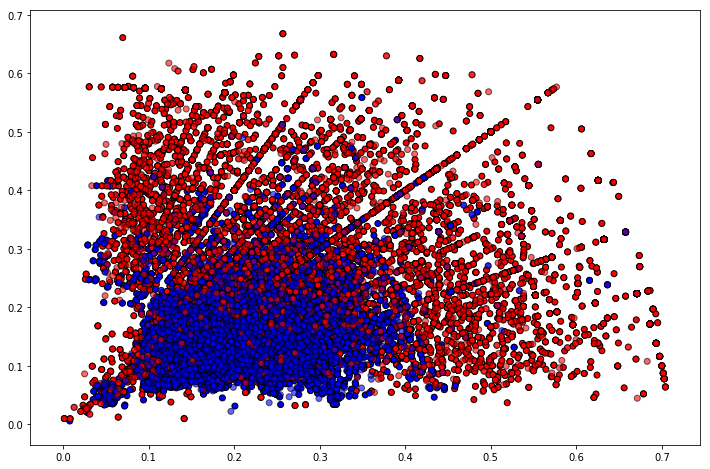

In [22]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

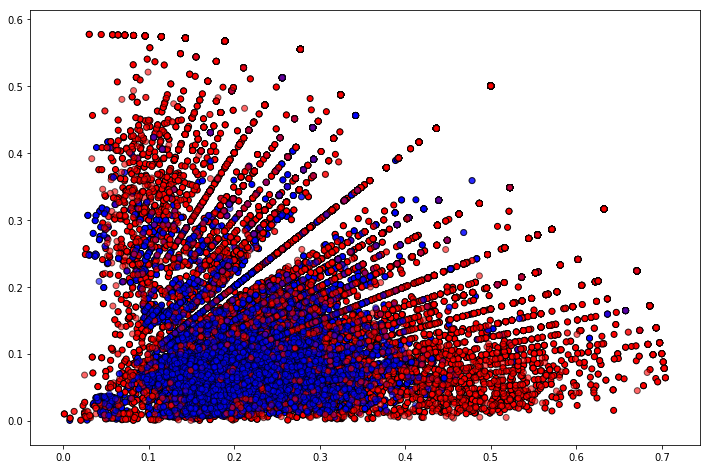

In [23]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 2], X_train[:, 4], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 2], X_test[:, 4], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.show()

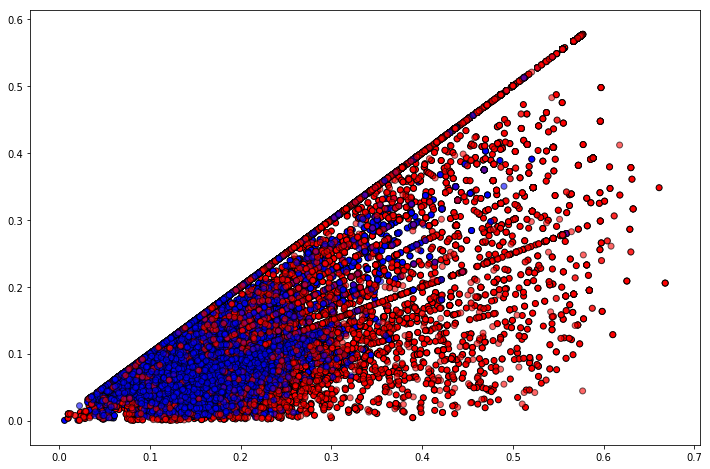

In [24]:
plt.figure(figsize=(12, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 3], X_train[:, 4], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 3], X_test[:, 4], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

plt.show()

It seems we are doomed ):

Ok, let's check **boosting.**

In [25]:
clf = CatBoostClassifier(random_seed=42)
clf.fit(X_train, y_train)

0:	learn: 0.6708165	total: 75.6ms	remaining: 1m 15s
1:	learn: 0.6496728	total: 100ms	remaining: 50s
2:	learn: 0.6304461	total: 123ms	remaining: 40.9s
3:	learn: 0.6124963	total: 146ms	remaining: 36.4s
4:	learn: 0.5957788	total: 187ms	remaining: 37.2s
5:	learn: 0.5788226	total: 208ms	remaining: 34.4s
6:	learn: 0.5645062	total: 231ms	remaining: 32.7s
7:	learn: 0.5505265	total: 254ms	remaining: 31.5s
8:	learn: 0.5380474	total: 277ms	remaining: 30.5s
9:	learn: 0.5263550	total: 302ms	remaining: 29.9s
10:	learn: 0.5158000	total: 324ms	remaining: 29.2s
11:	learn: 0.5053746	total: 370ms	remaining: 30.4s
12:	learn: 0.4954059	total: 391ms	remaining: 29.7s
13:	learn: 0.4862001	total: 415ms	remaining: 29.2s
14:	learn: 0.4772212	total: 437ms	remaining: 28.7s
15:	learn: 0.4693032	total: 458ms	remaining: 28.1s
16:	learn: 0.4619298	total: 479ms	remaining: 27.7s
17:	learn: 0.4554445	total: 500ms	remaining: 27.3s
18:	learn: 0.4491019	total: 524ms	remaining: 27.1s
19:	learn: 0.4429298	total: 545ms	remaini

161:	learn: 0.3263775	total: 4.42s	remaining: 22.9s
162:	learn: 0.3262123	total: 4.44s	remaining: 22.8s
163:	learn: 0.3261067	total: 4.46s	remaining: 22.7s
164:	learn: 0.3259678	total: 4.48s	remaining: 22.7s
165:	learn: 0.3257149	total: 4.5s	remaining: 22.6s
166:	learn: 0.3256057	total: 4.53s	remaining: 22.6s
167:	learn: 0.3254376	total: 4.55s	remaining: 22.5s
168:	learn: 0.3253175	total: 4.58s	remaining: 22.5s
169:	learn: 0.3251376	total: 4.61s	remaining: 22.5s
170:	learn: 0.3250509	total: 4.63s	remaining: 22.5s
171:	learn: 0.3249249	total: 4.66s	remaining: 22.4s
172:	learn: 0.3247950	total: 4.68s	remaining: 22.4s
173:	learn: 0.3246168	total: 4.7s	remaining: 22.3s
174:	learn: 0.3243820	total: 4.72s	remaining: 22.3s
175:	learn: 0.3242145	total: 4.74s	remaining: 22.2s
176:	learn: 0.3240581	total: 4.76s	remaining: 22.1s
177:	learn: 0.3239285	total: 4.79s	remaining: 22.1s
178:	learn: 0.3238125	total: 4.81s	remaining: 22s
179:	learn: 0.3237441	total: 4.83s	remaining: 22s
180:	learn: 0.3236

320:	learn: 0.3096350	total: 8.87s	remaining: 18.8s
321:	learn: 0.3095533	total: 8.89s	remaining: 18.7s
322:	learn: 0.3094980	total: 8.91s	remaining: 18.7s
323:	learn: 0.3094385	total: 8.93s	remaining: 18.6s
324:	learn: 0.3093903	total: 8.95s	remaining: 18.6s
325:	learn: 0.3093117	total: 8.97s	remaining: 18.6s
326:	learn: 0.3091999	total: 8.99s	remaining: 18.5s
327:	learn: 0.3091565	total: 9.02s	remaining: 18.5s
328:	learn: 0.3090419	total: 9.04s	remaining: 18.4s
329:	learn: 0.3090070	total: 9.05s	remaining: 18.4s
330:	learn: 0.3088986	total: 9.08s	remaining: 18.4s
331:	learn: 0.3088292	total: 9.1s	remaining: 18.3s
332:	learn: 0.3087310	total: 9.12s	remaining: 18.3s
333:	learn: 0.3086543	total: 9.14s	remaining: 18.2s
334:	learn: 0.3084875	total: 9.17s	remaining: 18.2s
335:	learn: 0.3084004	total: 9.19s	remaining: 18.2s
336:	learn: 0.3082888	total: 9.21s	remaining: 18.1s
337:	learn: 0.3082245	total: 9.23s	remaining: 18.1s
338:	learn: 0.3081840	total: 9.25s	remaining: 18s
339:	learn: 0.3

485:	learn: 0.2993082	total: 12.2s	remaining: 12.9s
486:	learn: 0.2991888	total: 12.3s	remaining: 12.9s
487:	learn: 0.2991340	total: 12.3s	remaining: 12.9s
488:	learn: 0.2990546	total: 12.3s	remaining: 12.8s
489:	learn: 0.2989965	total: 12.3s	remaining: 12.8s
490:	learn: 0.2989699	total: 12.3s	remaining: 12.8s
491:	learn: 0.2989497	total: 12.4s	remaining: 12.8s
492:	learn: 0.2988917	total: 12.4s	remaining: 12.7s
493:	learn: 0.2988469	total: 12.4s	remaining: 12.7s
494:	learn: 0.2988297	total: 12.4s	remaining: 12.7s
495:	learn: 0.2987929	total: 12.4s	remaining: 12.6s
496:	learn: 0.2987569	total: 12.5s	remaining: 12.6s
497:	learn: 0.2987347	total: 12.5s	remaining: 12.6s
498:	learn: 0.2986750	total: 12.5s	remaining: 12.5s
499:	learn: 0.2986513	total: 12.5s	remaining: 12.5s
500:	learn: 0.2986024	total: 12.5s	remaining: 12.5s
501:	learn: 0.2985571	total: 12.6s	remaining: 12.5s
502:	learn: 0.2985186	total: 12.6s	remaining: 12.4s
503:	learn: 0.2984238	total: 12.6s	remaining: 12.4s
504:	learn: 

648:	learn: 0.2922127	total: 15.5s	remaining: 8.4s
649:	learn: 0.2921814	total: 15.6s	remaining: 8.38s
650:	learn: 0.2921353	total: 15.6s	remaining: 8.35s
651:	learn: 0.2921014	total: 15.6s	remaining: 8.32s
652:	learn: 0.2920874	total: 15.6s	remaining: 8.3s
653:	learn: 0.2920622	total: 15.6s	remaining: 8.27s
654:	learn: 0.2920598	total: 15.7s	remaining: 8.24s
655:	learn: 0.2920055	total: 15.7s	remaining: 8.22s
656:	learn: 0.2919675	total: 15.7s	remaining: 8.19s
657:	learn: 0.2919088	total: 15.7s	remaining: 8.17s
658:	learn: 0.2918806	total: 15.7s	remaining: 8.14s
659:	learn: 0.2918146	total: 15.8s	remaining: 8.12s
660:	learn: 0.2917779	total: 15.8s	remaining: 8.09s
661:	learn: 0.2917541	total: 15.8s	remaining: 8.06s
662:	learn: 0.2916947	total: 15.8s	remaining: 8.04s
663:	learn: 0.2916279	total: 15.8s	remaining: 8.01s
664:	learn: 0.2915777	total: 15.9s	remaining: 7.99s
665:	learn: 0.2915205	total: 15.9s	remaining: 7.96s
666:	learn: 0.2914634	total: 15.9s	remaining: 7.94s
667:	learn: 0.

814:	learn: 0.2862472	total: 18.9s	remaining: 4.29s
815:	learn: 0.2862117	total: 18.9s	remaining: 4.26s
816:	learn: 0.2861789	total: 18.9s	remaining: 4.24s
817:	learn: 0.2861326	total: 18.9s	remaining: 4.21s
818:	learn: 0.2861066	total: 19s	remaining: 4.19s
819:	learn: 0.2860696	total: 19s	remaining: 4.17s
820:	learn: 0.2860529	total: 19s	remaining: 4.14s
821:	learn: 0.2860354	total: 19s	remaining: 4.12s
822:	learn: 0.2860155	total: 19s	remaining: 4.1s
823:	learn: 0.2859898	total: 19.1s	remaining: 4.07s
824:	learn: 0.2859331	total: 19.1s	remaining: 4.05s
825:	learn: 0.2859003	total: 19.1s	remaining: 4.03s
826:	learn: 0.2858555	total: 19.1s	remaining: 4s
827:	learn: 0.2858174	total: 19.2s	remaining: 3.98s
828:	learn: 0.2857900	total: 19.2s	remaining: 3.95s
829:	learn: 0.2857352	total: 19.2s	remaining: 3.93s
830:	learn: 0.2856950	total: 19.2s	remaining: 3.91s
831:	learn: 0.2856869	total: 19.2s	remaining: 3.88s
832:	learn: 0.2856481	total: 19.2s	remaining: 3.86s
833:	learn: 0.2856118	tota

979:	learn: 0.2818105	total: 22.7s	remaining: 463ms
980:	learn: 0.2817482	total: 22.7s	remaining: 440ms
981:	learn: 0.2817282	total: 22.8s	remaining: 417ms
982:	learn: 0.2817187	total: 22.8s	remaining: 394ms
983:	learn: 0.2817048	total: 22.8s	remaining: 371ms
984:	learn: 0.2816819	total: 22.8s	remaining: 347ms
985:	learn: 0.2816549	total: 22.8s	remaining: 324ms
986:	learn: 0.2816321	total: 22.9s	remaining: 301ms
987:	learn: 0.2816119	total: 22.9s	remaining: 278ms
988:	learn: 0.2815932	total: 22.9s	remaining: 255ms
989:	learn: 0.2815837	total: 22.9s	remaining: 232ms
990:	learn: 0.2815383	total: 22.9s	remaining: 208ms
991:	learn: 0.2815029	total: 23s	remaining: 185ms
992:	learn: 0.2814770	total: 23s	remaining: 162ms
993:	learn: 0.2814593	total: 23s	remaining: 139ms
994:	learn: 0.2814403	total: 23s	remaining: 116ms
995:	learn: 0.2814331	total: 23.1s	remaining: 92.6ms
996:	learn: 0.2814031	total: 23.1s	remaining: 69.5ms
997:	learn: 0.2813797	total: 23.1s	remaining: 46.3ms
998:	learn: 0.281

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print('ACCURACY:\n        {:4f}'.format(accuracy_score(y_pred, y_test)))

ACCURACY:
        0.879330


Not bad!  
Let's check **KNN** (not sure it'll boost our accuracy).

In [28]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print('ACCURACY:\n        {:4f}'.format(accuracy_score(y_pred, y_test)))

ACCURACY:
        0.857320


In [31]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print('ACCURACY:\n        {:4f}'.format(accuracy_score(y_pred, y_test)))

ACCURACY:
        0.876695


So it seems that boosting handles situation better than anything.  
Let's plot some curves.

In [34]:
clf = CatBoostClassifier(random_seed=42)
clf.fit(X_train, y_train)

0:	learn: 0.6708165	total: 20.3ms	remaining: 20.2s
1:	learn: 0.6496728	total: 40.2ms	remaining: 20s
2:	learn: 0.6304461	total: 69.5ms	remaining: 23.1s
3:	learn: 0.6124963	total: 89.7ms	remaining: 22.3s
4:	learn: 0.5957788	total: 110ms	remaining: 21.9s
5:	learn: 0.5788226	total: 130ms	remaining: 21.5s
6:	learn: 0.5645062	total: 153ms	remaining: 21.7s
7:	learn: 0.5505265	total: 174ms	remaining: 21.5s
8:	learn: 0.5380474	total: 194ms	remaining: 21.3s
9:	learn: 0.5263550	total: 214ms	remaining: 21.2s
10:	learn: 0.5158000	total: 237ms	remaining: 21.3s
11:	learn: 0.5053746	total: 261ms	remaining: 21.5s
12:	learn: 0.4954059	total: 281ms	remaining: 21.4s
13:	learn: 0.4862001	total: 302ms	remaining: 21.2s
14:	learn: 0.4772212	total: 322ms	remaining: 21.1s
15:	learn: 0.4693032	total: 341ms	remaining: 21s
16:	learn: 0.4619298	total: 366ms	remaining: 21.2s
17:	learn: 0.4554445	total: 386ms	remaining: 21.1s
18:	learn: 0.4491019	total: 407ms	remaining: 21s
19:	learn: 0.4429298	total: 426ms	remaining

163:	learn: 0.3261067	total: 3.5s	remaining: 17.9s
164:	learn: 0.3259678	total: 3.54s	remaining: 17.9s
165:	learn: 0.3257149	total: 3.56s	remaining: 17.9s
166:	learn: 0.3256057	total: 3.58s	remaining: 17.9s
167:	learn: 0.3254376	total: 3.6s	remaining: 17.8s
168:	learn: 0.3253175	total: 3.62s	remaining: 17.8s
169:	learn: 0.3251376	total: 3.64s	remaining: 17.8s
170:	learn: 0.3250509	total: 3.66s	remaining: 17.7s
171:	learn: 0.3249249	total: 3.68s	remaining: 17.7s
172:	learn: 0.3247950	total: 3.7s	remaining: 17.7s
173:	learn: 0.3246168	total: 3.72s	remaining: 17.7s
174:	learn: 0.3243820	total: 3.74s	remaining: 17.6s
175:	learn: 0.3242145	total: 3.76s	remaining: 17.6s
176:	learn: 0.3240581	total: 3.78s	remaining: 17.6s
177:	learn: 0.3239285	total: 3.8s	remaining: 17.5s
178:	learn: 0.3238125	total: 3.82s	remaining: 17.5s
179:	learn: 0.3237441	total: 3.84s	remaining: 17.5s
180:	learn: 0.3236243	total: 3.86s	remaining: 17.5s
181:	learn: 0.3234823	total: 3.88s	remaining: 17.4s
182:	learn: 0.32

325:	learn: 0.3093117	total: 6.96s	remaining: 14.4s
326:	learn: 0.3091999	total: 6.98s	remaining: 14.4s
327:	learn: 0.3091565	total: 7.01s	remaining: 14.4s
328:	learn: 0.3090419	total: 7.03s	remaining: 14.3s
329:	learn: 0.3090070	total: 7.05s	remaining: 14.3s
330:	learn: 0.3088986	total: 7.07s	remaining: 14.3s
331:	learn: 0.3088292	total: 7.09s	remaining: 14.3s
332:	learn: 0.3087310	total: 7.12s	remaining: 14.3s
333:	learn: 0.3086543	total: 7.14s	remaining: 14.2s
334:	learn: 0.3084875	total: 7.17s	remaining: 14.2s
335:	learn: 0.3084004	total: 7.19s	remaining: 14.2s
336:	learn: 0.3082888	total: 7.21s	remaining: 14.2s
337:	learn: 0.3082245	total: 7.23s	remaining: 14.2s
338:	learn: 0.3081840	total: 7.25s	remaining: 14.1s
339:	learn: 0.3081331	total: 7.27s	remaining: 14.1s
340:	learn: 0.3080889	total: 7.29s	remaining: 14.1s
341:	learn: 0.3080118	total: 7.31s	remaining: 14.1s
342:	learn: 0.3078840	total: 7.33s	remaining: 14s
343:	learn: 0.3077678	total: 7.35s	remaining: 14s
344:	learn: 0.30

484:	learn: 0.2993376	total: 10.2s	remaining: 10.9s
485:	learn: 0.2993082	total: 10.2s	remaining: 10.8s
486:	learn: 0.2991888	total: 10.3s	remaining: 10.8s
487:	learn: 0.2991340	total: 10.3s	remaining: 10.8s
488:	learn: 0.2990546	total: 10.3s	remaining: 10.8s
489:	learn: 0.2989965	total: 10.3s	remaining: 10.7s
490:	learn: 0.2989699	total: 10.3s	remaining: 10.7s
491:	learn: 0.2989497	total: 10.4s	remaining: 10.7s
492:	learn: 0.2988917	total: 10.4s	remaining: 10.7s
493:	learn: 0.2988469	total: 10.4s	remaining: 10.7s
494:	learn: 0.2988297	total: 10.4s	remaining: 10.6s
495:	learn: 0.2987929	total: 10.4s	remaining: 10.6s
496:	learn: 0.2987569	total: 10.5s	remaining: 10.6s
497:	learn: 0.2987347	total: 10.5s	remaining: 10.6s
498:	learn: 0.2986750	total: 10.5s	remaining: 10.5s
499:	learn: 0.2986513	total: 10.5s	remaining: 10.5s
500:	learn: 0.2986024	total: 10.5s	remaining: 10.5s
501:	learn: 0.2985571	total: 10.6s	remaining: 10.5s
502:	learn: 0.2985186	total: 10.6s	remaining: 10.5s
503:	learn: 

645:	learn: 0.2923303	total: 13.9s	remaining: 7.63s
646:	learn: 0.2923052	total: 13.9s	remaining: 7.61s
647:	learn: 0.2922530	total: 14s	remaining: 7.59s
648:	learn: 0.2922127	total: 14s	remaining: 7.57s
649:	learn: 0.2921814	total: 14s	remaining: 7.54s
650:	learn: 0.2921353	total: 14s	remaining: 7.52s
651:	learn: 0.2921014	total: 14s	remaining: 7.5s
652:	learn: 0.2920874	total: 14.1s	remaining: 7.48s
653:	learn: 0.2920622	total: 14.1s	remaining: 7.46s
654:	learn: 0.2920598	total: 14.1s	remaining: 7.43s
655:	learn: 0.2920055	total: 14.1s	remaining: 7.41s
656:	learn: 0.2919675	total: 14.2s	remaining: 7.39s
657:	learn: 0.2919088	total: 14.2s	remaining: 7.37s
658:	learn: 0.2918806	total: 14.2s	remaining: 7.34s
659:	learn: 0.2918146	total: 14.2s	remaining: 7.32s
660:	learn: 0.2917779	total: 14.2s	remaining: 7.3s
661:	learn: 0.2917541	total: 14.3s	remaining: 7.28s
662:	learn: 0.2916947	total: 14.3s	remaining: 7.26s
663:	learn: 0.2916279	total: 14.3s	remaining: 7.24s
664:	learn: 0.2915777	to

807:	learn: 0.2865550	total: 18.9s	remaining: 4.48s
808:	learn: 0.2864681	total: 18.9s	remaining: 4.46s
809:	learn: 0.2864160	total: 18.9s	remaining: 4.43s
810:	learn: 0.2863775	total: 18.9s	remaining: 4.41s
811:	learn: 0.2863634	total: 18.9s	remaining: 4.38s
812:	learn: 0.2863527	total: 19s	remaining: 4.36s
813:	learn: 0.2863050	total: 19s	remaining: 4.34s
814:	learn: 0.2862472	total: 19s	remaining: 4.31s
815:	learn: 0.2862117	total: 19s	remaining: 4.29s
816:	learn: 0.2861789	total: 19s	remaining: 4.27s
817:	learn: 0.2861326	total: 19.1s	remaining: 4.24s
818:	learn: 0.2861066	total: 19.1s	remaining: 4.22s
819:	learn: 0.2860696	total: 19.1s	remaining: 4.19s
820:	learn: 0.2860529	total: 19.1s	remaining: 4.17s
821:	learn: 0.2860354	total: 19.1s	remaining: 4.15s
822:	learn: 0.2860155	total: 19.2s	remaining: 4.12s
823:	learn: 0.2859898	total: 19.2s	remaining: 4.1s
824:	learn: 0.2859331	total: 19.2s	remaining: 4.07s
825:	learn: 0.2859003	total: 19.2s	remaining: 4.05s
826:	learn: 0.2858555	t

967:	learn: 0.2820559	total: 22.2s	remaining: 735ms
968:	learn: 0.2820166	total: 22.2s	remaining: 712ms
969:	learn: 0.2819783	total: 22.3s	remaining: 689ms
970:	learn: 0.2819681	total: 22.3s	remaining: 666ms
971:	learn: 0.2819404	total: 22.3s	remaining: 643ms
972:	learn: 0.2819203	total: 22.3s	remaining: 620ms
973:	learn: 0.2819201	total: 22.4s	remaining: 597ms
974:	learn: 0.2819002	total: 22.4s	remaining: 574ms
975:	learn: 0.2818769	total: 22.4s	remaining: 551ms
976:	learn: 0.2818711	total: 22.4s	remaining: 528ms
977:	learn: 0.2818479	total: 22.4s	remaining: 505ms
978:	learn: 0.2818315	total: 22.5s	remaining: 482ms
979:	learn: 0.2818105	total: 22.5s	remaining: 459ms
980:	learn: 0.2817482	total: 22.5s	remaining: 436ms
981:	learn: 0.2817282	total: 22.5s	remaining: 413ms
982:	learn: 0.2817187	total: 22.5s	remaining: 390ms
983:	learn: 0.2817048	total: 22.6s	remaining: 367ms
984:	learn: 0.2816819	total: 22.6s	remaining: 344ms
985:	learn: 0.2816549	total: 22.6s	remaining: 321ms
986:	learn: 

In [35]:
y_score = clf.predict_proba(X_test)

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

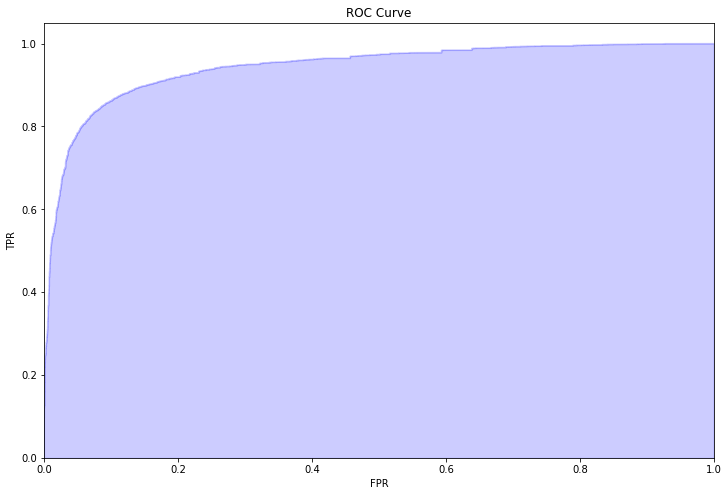

In [37]:
plt.figure(figsize=(12,8))

plt.step(fpr, tpr, color='b', alpha=0.2, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('ROC Curve')
plt.show()

In [38]:
print('ROC-AUC:\n    {:4f}'.format(auc(fpr, tpr)))

ROC-AUC:
    0.943657


In [39]:
precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])

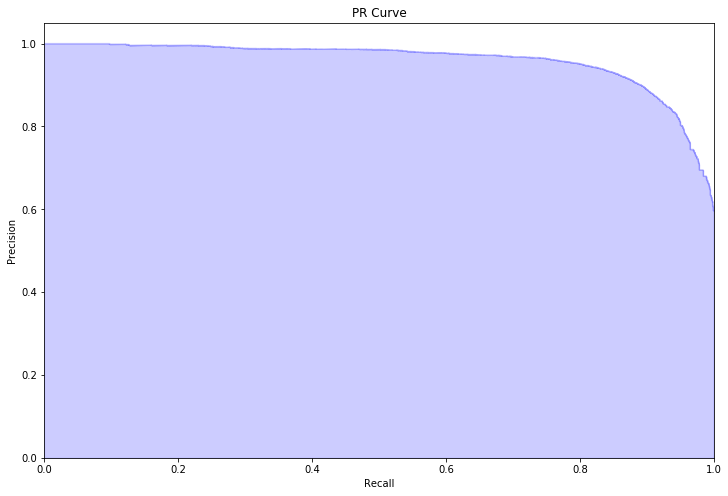

In [40]:
plt.figure(figsize=(12,8))

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PR Curve')
plt.show()

In [41]:
print('PR-AUC:\n    {:4f}'.format(auc(recall, precision)))

PR-AUC:
    0.959760


Let's talk a little bit about problems and mistakes of the final classifier:
* First, it seems that it's not easy to reduce dimensions - classifier believes that almost all of them are important (can be seen below this markdown). 
* Another problem is that boosting algorithms are not very optimizable by changing the parametrs. So the final score can't be upgraded significantly.

But on the bright sight:
* Accuracy is OK (close to 0.88)
* Curves are nice (close to 1)

In [42]:
print('FEATURE IMPORTANCE CATBOOST:\n        {}'.format(clf.feature_importances_))

FEATURE IMPORTANCE CATBOOST:
        [22.948540291510028, 11.521107294743583, 19.830420272783563, 20.035390213872223, 25.6645419270906]
